In [313]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
# Load the data file using pandas. 
df = pd.read_csv('googleplaystore.csv')

# ******** 1 Know your data ********

In [315]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [317]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
# Check for null values in the data. Get the number of null values for each column

In [319]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [320]:
round((df.isnull().sum()/ df.shape[0]) * 100,2)

App                0.00
Category           0.00
Rating            13.60
Reviews            0.00
Size               0.00
Installs           0.00
Type               0.01
Price              0.00
Content Rating     0.01
Genres             0.00
Last Updated       0.00
Current Ver        0.07
Android Ver        0.03
dtype: float64

In [321]:
df.shape

(10841, 13)

In [322]:
df.dropna(inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [323]:
df.shape

(9360, 13)

In [324]:
# Variables seem to have incorrect type and inconsistent formatting.You need to fix them

    #Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

    #Extract the numeric value from the column

    #Multiply the value by 1,000, if size is mentioned in Mb

In [325]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [326]:
 df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [327]:
def size_convert(y):
    if 'M' in y:
        x = y[:-1] #19M
        x = float(x)*1000
        return x
    elif 'K' in y:
        x = y[:-1]
        return x
    else:
        return None


In [328]:
df['Size'] = df['Size'].apply(size_convert)

In [329]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [330]:
# Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
df['Reviews'] = df['Reviews'].astype(float)

In [331]:
df['Size'].value_counts()

14000.0    165
12000.0    161
11000.0    159
15000.0    159
13000.0    157
          ... 
89000.0      9
84000.0      9
86000.0      8
90000.0      5
1000.0       4
Name: Size, Length: 181, dtype: int64

In [332]:
df['Size'].isnull().sum()

1894

In [333]:
df['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [334]:
# df['Size'].fillna(method='ffill',inplace=True)
df['Size'] = df['Size'].fillna(0.0)

In [335]:
df['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        0.0
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [336]:
# Installs field is currently stored as string and has values like 1,000,000+. 

    #Treat 1,000,000+ as 1,000,000

    # remove ‘+’, ‘,’ from the field, convert it to integer

In [337]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [338]:
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')

In [339]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [340]:
df['Installs'] = df['Installs'].astype(int)

In [341]:
# Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1023.8+ KB


# Sanity checks:

    Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this
    range.
    Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.
    For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [343]:
df['Reviews']= df['Reviews'].astype(float)

In [344]:
df[df['Reviews']>df['Installs']].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [345]:
df.drop(df[df['Reviews']>df['Installs']].index,inplace=True)

In [346]:
df[df['Reviews']>df['Installs']].index

Int64Index([], dtype='int64')

In [347]:
df['Rating'].min(),df['Rating'].max() # No overvation found for more 5 and less than 1 Ratings

(1.0, 5.0)

In [348]:
df['Rating'].mean()

4.191254143055709

In [349]:
df[df['Reviews']>df['Installs']].index

Int64Index([], dtype='int64')

In [350]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [351]:
# Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].astype(float)

In [352]:
df['Price'][df['Type']=='Free'].min()

0.0

In [353]:
df['Price'][df['Type']=='Free'].max()

0.0

In [354]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [355]:
df[(df['Price']>0) & (df['Type']=='Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 2 Univariate Analysis
    5. Performing univariate analysis:
    Boxplot for Price
    Are there any outliers? Think about the price of usual apps on Play Store.
    Boxplot for Reviews
    Are there any apps with very high number of reviews? Do the values seem right?
    Histogram for Rating
    How are the ratings distributed? Is it more toward higher ratings?
    Histogram for Size
    Note down your observations for the plots made above. Which of these seem to have outliers?Are there any outliers? Think about the price of usual apps on Play Store.

In [356]:
df['Price'].drop_duplicates()

0        0.00
234      4.99
427      3.99
477      6.99
481      7.99
         ... 
9465     2.95
9490     2.90
9566     1.97
9869     2.56
10785    1.20
Name: Price, Length: 73, dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


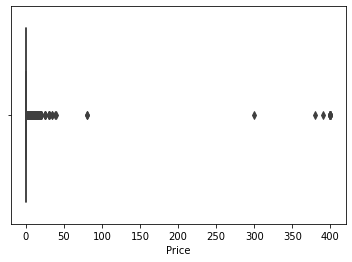

In [357]:
#Boxplot for Price
sns.boxplot('Price',data=df)
plt.show()

In [358]:
# Are there any outliers? Think about the price of usual apps on Play Store.

#Ans : Yes, most of the apps are lies between 0-25-50$ price range and few apps lies between 300-400$ which is more than usual apps on play store 

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


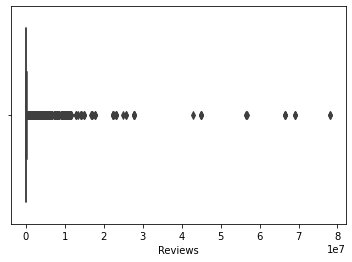

In [359]:
# Boxplot for Reviews
sns.boxplot('Reviews',data=df)
plt.show()

In [360]:
# Are there any apps with very high number of reviews? Do the values seem right?
# Ans -  Certaintly there are some app which has high number of reviews

In [361]:
df['Reviews'].max()

78158306.0

In [362]:
df['Reviews'].mean()

514760.5758580135

In [363]:
df['Reviews'].describe()

count    9.353000e+03
mean     5.147606e+05
std      3.146169e+06
min      1.000000e+00
25%      1.870000e+02
50%      5.967000e+03
75%      8.174700e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [364]:
# Histogram for Ratingunique

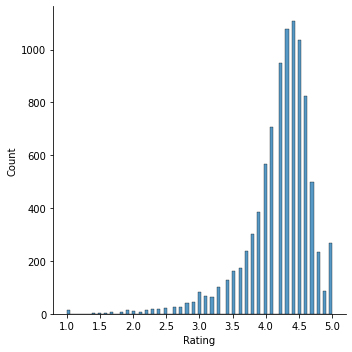

In [365]:
sns.displot(df['Rating'])

In [366]:
# How are the ratings distributed? Is it more toward higher ratings?
# if majority of the data is towards left then it is right skewed distribution
# if the majority of the data is towards right then it is left skewed distribution

# Ans -There is negative skewed data (left side) , some apps having higher rating that usual 


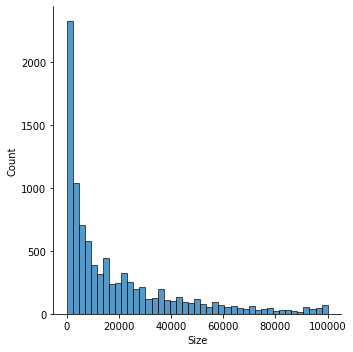

In [367]:
# Histogram for Size
sns.displot(df['Size'])

In [368]:
# Graph indicates positovly skewed(Right side) data 

# 3 Outliers
    6. Outlier treatment:
    Price: From the box plot, it seems like there are some apps with very high price. A price of $200
    for an application on the Play Store is very high and suspicious!
    Check out the records with very high price
    Is 200 indeed a high price?
    Drop these as most seem to be junk apps
    Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help
    with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.
    Installs: There seems to be some outliers in this field too. Apps having very high number of installs
    should be dropped from the analysis.
    Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
    Decide a threshold as cutoff for outlier and drop records having values more than that

In [369]:
df[df['Price']>200].size

195

In [370]:
# There are 195 obervation where apps has price greater that 200

In [371]:
# Size of data before dropping 
df.shape

(9353, 13)

In [372]:
# df.drop(df['Price']>200
df.drop(df[df['Price']>200].index,inplace=True)

In [373]:
df[df['Price']>200].size

0

In [374]:
df.shape

(9338, 13)

# 4 Review Drops
    Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help
    with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [375]:
df['Reviews'].min()

1.0

In [376]:
df['Reviews'].max()

78158306.0

In [377]:
# drop records check shape before and after

In [378]:
df.shape

(9338, 13)

In [379]:
df[df['Reviews']>20e5].count()

App               453
Category          453
Rating            453
Reviews           453
Size              453
Installs          453
Type              453
Price             453
Content Rating    453
Genres            453
Last Updated      453
Current Ver       453
Android Ver       453
dtype: int64

In [380]:
#Drop rows from DB where reviews >2mn
df.drop(df[df['Reviews']>20e5].index,inplace=True)

In [381]:
df.shape
# Size of data after dropping

(8885, 13)

# 5 Installs: There seems to be some outliers in this field too. Apps
    having very high number of installs should be dropped from the
    analysis.
    Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
    Decide a threshold as cutoff for outlier and drop records having values more than that

In [382]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


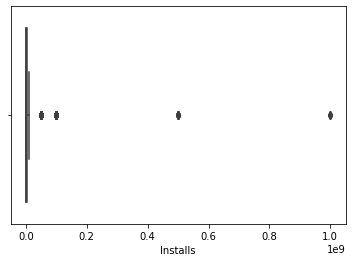

In [383]:
sns.boxplot('Installs',data=df)
plt.show()

In [384]:
# divide the data in percentiles
df['Installs'].quantile([0.1,.25,.5,.7,.9,.95,.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [385]:
 # remove very high installation value

In [386]:
# Installation with very high value to be removed
df.drop(df[df['Installs']>=100000000.0].index,inplace=True)

In [387]:
df.shape

(8743, 13)

# 6 Bivariate Analysis
    7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest,
    i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for
    character features) to assess the relations between rating and the other features.
        Make scatter plot/joinplot for Rating vs. Price
        What pattern do you observe? Does rating increase with price?
        Make scatter plot/joinplot for Rating vs. Size
        Are heavier apps rated better?
        Make scatter plot/joinplot for Rating vs. Reviews
        Does more review mean a better rating always?
        Make boxplot for Rating vs. Content Rating
        Is there any difference in the ratings? Are some types liked better?
        Make boxplot for Ratings vs. Category
        Which genre has the best ratings?

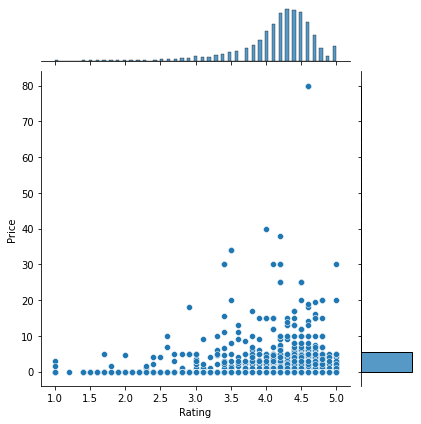

In [388]:
sns.jointplot(x='Rating',y='Price',data=df)

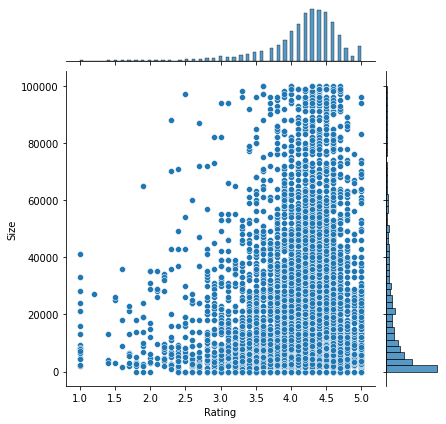

In [389]:
sns.jointplot(x='Rating',y='Size',data=df)

In [390]:
# Based on above 2 graphs paid apps have the highest of Ratings

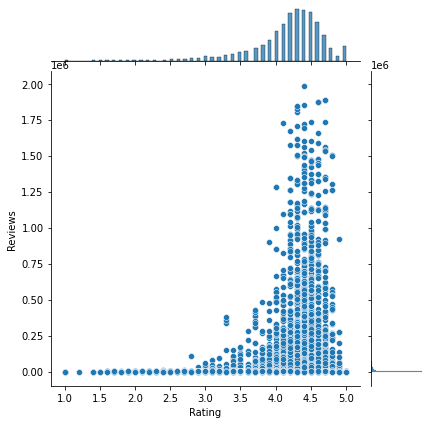

In [391]:
sns.jointplot(x='Rating',y='Reviews',data=df)

In [392]:
# The plots show a positive linear relationship; as the Size increases the Ratings increases. This stats the heavier apps are rated better

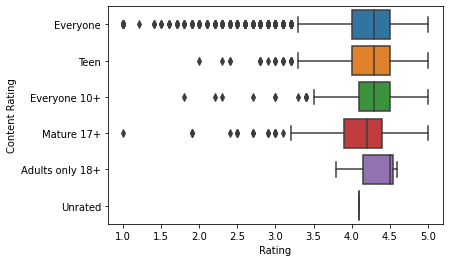

In [393]:
sns.boxplot(x='Rating',y='Content Rating',data=df)
plt.show()

In [394]:
#The above plot shows the apps for Everyone is worst rated as it contain the highest number of outliers followed by apps for Mature 17+ and Everyone 10+ along with Teen. The catergory Adults only 18+ is rated better and falls under most liked type

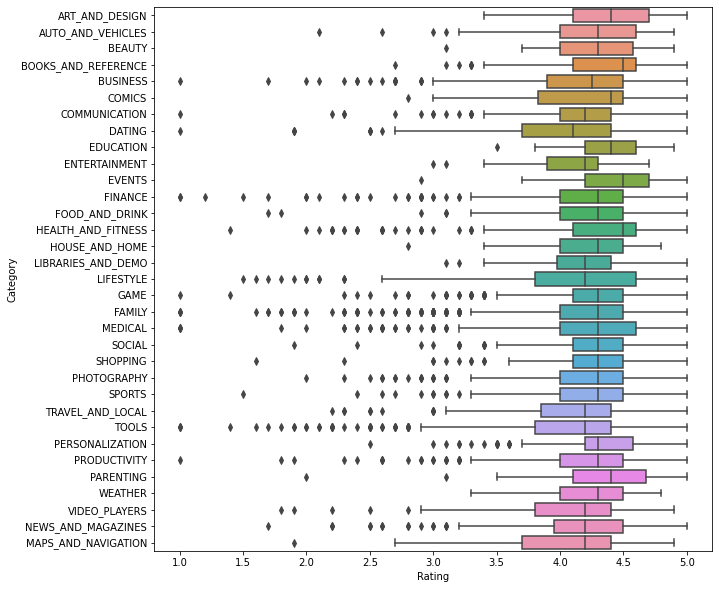

In [395]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating',y='Category',data=df)
plt.show()

In [396]:
# Game and Family category are the most appearances for application in google play store

# 7 Machine Learning
    8. Data preprocessing
    For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
    Reviews and Install have some values that are still relatively very high. Before building a linear
    regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews
    and Installs.
    Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful
    for our task.
    Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the
    models do not understand categorical data, and all data should be numeric. Dummy encoding is
    one way to convert character fields to numeric. Name of dataframe should be inp2.
    9. Train test split and apply 70-30 split. Name the new dataframes df_train and df_test.
    10. Separate the dataframes into X_train, y_train, X_test, and y_test.
    11 . Model building
    Use linear regression as the technique
    Report the R2 on the train set
    12. Make predictions on test set and report R2.

In [397]:
# extract the features
# data encoding
# transformation
# Train test

In [398]:
# For the steps below, create a copy of the dataframe to make all the edits.Name it inp1.
inp1 = df.copy()

In [399]:
inp1.skew()

Rating      -1.777070
Reviews      4.149314
Size         1.643761
Installs     4.401787
Price       16.495052
dtype: float64

In [400]:
reviewskew = np.log1p(inp1['Reviews'])
inp1['Reviews'] = reviewskew

In [401]:
reviewskew.skew()

-0.19114430925837925

In [402]:
installsskew = np.log1p(inp1['Installs'])
inp1['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8743, dtype: int64

In [403]:
installsskew.skew()

-0.46306064681638154

In [404]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [405]:
inp1.drop(["Last Updated","Current Ver","Android Ver","App","Type"],axis=1,inplace=True)

In [406]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,12.281389,25000.0,50000000,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,0.0,Everyone,Art & Design;Creativity


In [407]:
inp1.shape

(8743, 8)

In [408]:
inp2 = inp1

In [409]:
inp2.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,12.281389,25000.0,50000000,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,0.0,Everyone,Art & Design;Creativity


# Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. hence column need log transformation

In [410]:
#get unique values in Column "Category"
inp2.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [411]:
inp2.Category = pd.Categorical(inp2.Category)

x = inp2[['Category']]
del inp2['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,5.075174,19000.0,10000,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0.0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,25000.0,50000000,0.0,Teen,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,100000,0.0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [412]:
#get unique values in Column "Genres"
inp2["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual',
       'Casual;Pretend Play', 'Puzzle', 'Action', 'Arcade', 'Music',
       'Word', 'Racing', 'Casual;Creativity', 'Sports', 'Simulation',
       'Board', 'Role Playing', 'Adventure', 'Strategy',
       'Simulation;Education', 'Action;Action & Adventure', 'Trivia',
       'Casual;Brain Games', 'Simulation

In [413]:
lists = []
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres] 

In [414]:
inp2["Genres"].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Card', 'Casual', 'Casual;Pretend Play', 'Puzzle',
       'Action', 'Arcade', 'Music', 'Word', 'Racing', 'Sports',
       'Simulation', 'Board', 'Role Playing', 'Adventure', 'Strategy',
       'Trivia', 'Educational;Education', 'Racing;Action & Adventure',
       'Medical', 'Social', 'Shopping', 'Photography', 'Travel & Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players & Editors', 'News & Magazines', 'Maps & Navigation',
       'Educational', 'Casino'], dtype=object)

In [415]:
inp2.Genres = pd.Categorical(inp2['Genres'])
x = inp2[["Genres"]]
del inp2['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
inp2 = pd.concat([inp2,dummies], axis=1)

In [416]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,10000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,500000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,25000.0,50000000,0.0,Teen,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,100000,0.0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [417]:
inp2.shape

(8743, 93)

In [418]:
#get unique values in Column "Content Rating"
inp2["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [419]:
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])

x = inp2[['Content Rating']]
del inp2['Content Rating']

dummies = pd.get_dummies(x, prefix = 'Content Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,10000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,500000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,12.281389,25000.0,50000000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,6.875232,2800.0,100000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [420]:
inp2.shape

(8743, 98)

# Model Building

In [421]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [422]:
# Train test split and apply 70-30 split. Name the new dataframes df_train and df_test.

# Separate the dataframes into X_train, y_train, X_test, and y_test

In [423]:
d1 = inp2
X = d1.drop('Rating',axis=1)
y = d1['Rating']

x_train, x_test, y_train, y_test = tts(X,y, test_size=0.3, random_state=5)

In [424]:
reg_all = LR()
reg_all.fit(x_train,y_train)

LinearRegression()

In [425]:
R2_train = round(reg_all.score(x_train,y_train),3)
print("The R2 value of the Training Set is : {}".format(R2_train))

The R2 value of the Training Set is : 0.083


In [426]:
R2_test = round(reg_all.score(Xtest,ytest),3)
print("The R2 value of the Testing Set is : {}".format(R2_test))

The R2 value of the Testing Set is : 0.05
